
# Project: Investigate a Dataset - [Agriculture]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The data chosen is from the [Systema Globalis](https://github.com/open-numbers/ddf--gapminder--systema_globalis/tree/master/countries-etc-datapoints) dataset.  
The csv files chosen focus on various aspects of agriculture across a number of countries.

The datasets chosen consist three columns each: 
+ Country: `geo`
+ Year: `time`
+ Observation of interest(agriculture-related)
> most of the observations are expressed as percentages of the total variable across the nation.  

The datasets chosen are:  
+ Agricultural land as a percent of total land
+ Agricultural water withdrawal/usage as a percentage of total water usage
+ Agricultural gdp as a percentage of total gdp
+ Agricultural workers as a percentage of total employment
+ Female Agricultural workers as a percentage of total female employment
+ Male Agricultural workers as a percentage of total male employment
+ Food supply in kcal per person per day


### Questions for Analysis
We'll be looking at data for two years: 2000 & 2005  
For both of these datasets, we'll try to figure out:
+ The top and bottom 5 countries by each of the metrics
+ The countries that are unable to meet the minimum daily food supply per person.  
  We'll compare that figure with the mean/median of our data.  
   We'll use mean if the distribution is normal, or median if skewed
+ How daily food supply relates to:
  - Land area under agriculture
  - Percentage of ag workers 
  - Percentage of female ag workers
  - Percentage of female ag workers 
  - Percentage of water used for agriculture
  - Percentage of ag gdp
  
  
In comparing the two years, we'd want to figure out:
+ The top 5 countries that:
  - Have the largest increase in land under ag
  - Have the highest increase in ag workers
  - Have seen the largest increase in ag gdp
  - Have the greatest increase in daily food supply

<a id='wrangling'></a>
## Data Wrangling

We'll import our data and clean it in this section.

In [1]:
# import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import functools as fc
%matplotlib inline

sns.set()

### Data Import 1:  Land Area

Import Agricultural _**land area**_ data and check its shape.

In [2]:
df_ag_land_area = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--agricultural_land_percent_of_land_area--by--geo--time.csv')
df_ag_land_area.head()

,geo,time,agricultural_land_percent_of_land_area
0,abw,1961,11.11111
1,abw,1962,11.11111
2,abw,1963,11.11111
3,abw,1964,11.11111
4,abw,1965,11.11111


In [3]:
df_ag_land_area.shape

(11145, 3)

### Data Import 2: Water Usage
Importing Agricultural _**water use**_ data and checking its shape

In [4]:
df_ag_water_use = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--agricultural_water_withdrawal_percent_of_total--by--geo--time.csv')
df_ag_water_use.head()

,geo,time,agricultural_water_withdrawal_percent_of_total
0,afg,1987,99.00
1,afg,2000,98.62
2,ago,1987,76.04
3,ago,2000,32.79
4,ago,2005,20.78


In [5]:
df_ag_water_use.shape

(565, 3)

### Data Import 3: GDP

Importing Agricultural _**gdp**_ data and checking its shape.

In [6]:
df_ag_gdp = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--agriculture_percent_of_gdp--by--geo--time.csv')
df_ag_gdp.head()

,geo,time,agriculture_percent_of_gdp
0,abw,1995,0.50600
1,abw,1996,0.48580
2,abw,1997,0.42995
3,abw,1998,0.40798
4,abw,1999,0.38329


In [7]:
df_ag_gdp.shape

(8089, 3)

### Data Import 4: Employment 
Importing Agricultural employment data and checking its shape.

In [8]:
df_ag_emp = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--agriculture_workers_percent_of_employment--by--geo--time.csv')
df_ag_emp.head()

,geo,time,agriculture_workers_percent_of_employment
0,afg,1991,63.43567
1,afg,1992,63.65692
2,afg,1993,64.41839
3,afg,1994,64.45237
4,afg,1995,64.30937


In [9]:
df_ag_emp.shape

(5481, 3)

### Data Import 5: Female Employment

Importing female agricultural employment data and checking its shape.

In [10]:
df_ag_f_emp = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--female_agriculture_workers_percent_of_female_employment--by--geo--time.csv')
df_ag_f_emp.head()

,geo,time,female_agriculture_workers_percent_of_female_employment
0,afg,1991,76.38111
1,afg,1992,76.40761
2,afg,1993,76.76205
3,afg,1994,76.33466
4,afg,1995,76.65198


In [11]:
df_ag_f_emp.shape

(5481, 3)

### Data Import 6: Male Employment

Importing male agricultural employment data and checking its shape.

In [12]:
df_ag_m_emp = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--male_agriculture_workers_percent_of_male_employment--by--geo--time.csv')
df_ag_m_emp.head()

,geo,time,male_agriculture_workers_percent_of_male_employment
0,afg,1991,61.11985
1,afg,1992,61.39577
2,afg,1993,62.24347
3,afg,1994,62.37418
4,afg,1995,62.15554


In [13]:
df_ag_m_emp.shape

(5481, 3)

### Data Import 7: Food Supply in Kcal

Importing daily agricultural food supply data per person and checking its shape.

In [14]:
df_daily_fd_supplykcal = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--food_supply_kilocalories_per_person_and_day--by--geo--time.csv') 
df_daily_fd_supplykcal.head()

,geo,time,food_supply_kilocalories_per_person_and_day
0,afg,1961,2999
1,afg,1962,2917
2,afg,1963,2698
3,afg,1964,2953
4,afg,1965,2956


In [15]:
df_daily_fd_supplykcal.shape

(9358, 3)

### Merge all into one dataframe

We only want data available in all 7 datasets. The 7 dataframes have vastly different lengths.   
The data should be on the same countries and years.  
We'll use `pd.merge` with an `inner join` for this.

In [16]:
# create a list with all dataframes
# fc.reduce helps us do the merging of all 7 dataframes in one step. 
# it iterates pd.merge over all the dataframes in dfs
dfs = [df_ag_land_area, df_ag_gdp, df_ag_water_use, df_ag_emp, df_ag_f_emp, df_ag_m_emp, df_daily_fd_supplykcal]
df_ag = fc.reduce(lambda left,right: pd.merge(left,right, on=['geo','time'], how='inner'), dfs)
df_ag.head()

,geo,time,agricultural_land_percent_of_land_area,agriculture_percent_of_gdp,agricultural_water_withdrawal_percent_of_total,agriculture_workers_percent_of_employment,female_agriculture_workers_percent_of_female_employment,male_agriculture_workers_percent_of_male_employment,food_supply_kilocalories_per_person_and_day
0,ago,2000,37.66856,5.66469,32.79,37.49670,44.93065,30.19378,1792
1,ago,2005,39.89468,5.06040,20.78,38.10669,46.08282,30.15065,2077
2,alb,2000,41.75182,24.51541,57.67,52.83294,63.97891,44.91493,2734
3,alb,2006,40.87591,17.70835,39.48,46.29605,58.53894,37.43404,2855
4,are,1995,5.39285,1.78707,66.79,7.99558,0.06008,9.03384,3261


### Data Cleaning
 

An inner join is supposed to fix the issue of null values, but we'll just check anyway

In [17]:
# check whether there are any nulls
df_ag.isnull().sum()

geo                                                        0
time                                                       0
agricultural_land_percent_of_land_area                     0
agriculture_percent_of_gdp                                 0
agricultural_water_withdrawal_percent_of_total             0
agriculture_workers_percent_of_employment                  0
female_agriculture_workers_percent_of_female_employment    0
male_agriculture_workers_percent_of_male_employment        0
food_supply_kilocalories_per_person_and_day                0
dtype: int64

Check for duplicates

In [18]:
# Check for duplicates
df_ag.duplicated().sum()

0

In [19]:
# check the shape
df_ag.shape

(376, 9)

In [20]:
# view our column names
df_ag.columns

Index(['geo', 'time', 'agricultural_land_percent_of_land_area',
       'agriculture_percent_of_gdp',
       'agricultural_water_withdrawal_percent_of_total',
       'agriculture_workers_percent_of_employment',
       'female_agriculture_workers_percent_of_female_employment',
       'male_agriculture_workers_percent_of_male_employment',
       'food_supply_kilocalories_per_person_and_day'],
      dtype='object')

##### Modify the column names

The column names are a bit too lengthy.  
We'll modify them as follows:
+ shorten `agricultural` and `agriculture` to `ag`
+ shorten `percent_of` to `pct_`. The extra underscore will help us trim the names.
+ shorten `withdrawal` to `use`
+ shorten `female` to `f`
+ shorten `male` to `m`
+ change the order of the name `ag_pct_gdp` to `ag_gdp_pct_` for consistency
> The shortening operations above will have been performed already
+ drop all characters starting from the double underscore `__`
+ shorten `food_supply_kilocalories_per_person_and_day` to `daily_fd_sply_kcal`

> **Just a reminder**  
All columns with a `pct` in the name represent the agricultural portion of the variable from the whole nation's total of the variable.  
Keep that in mind as we go further with our data.

In [21]:
df_ag.rename(columns= lambda x: x.replace('agricultural', 'ag')
             .replace('agriculture', 'ag').replace('percent_of','pct_')
             .replace('withdrawal', "use").replace('female','f').replace('male','m')
             .replace('employment','emp').replace('ag_pct__gdp', 'ag_gdp_pct__').split('__')[0]
             .replace('food_supply_kilocalories_per_person_and_day', 'daily_fd_sply_kcal'),
            inplace= True)
df_ag.columns

Index(['geo', 'time', 'ag_land_pct', 'ag_gdp_pct', 'ag_water_use_pct',
       'ag_workers_pct', 'f_ag_workers_pct', 'm_ag_workers_pct',
       'daily_fd_sply_kcal'],
      dtype='object')

### Check the datatypes 

We'll check the datatypes of our columns to ensure that the data is in the best form for analysis

In [22]:
df_ag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 375
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   geo                 376 non-null    object 
 1   time                376 non-null    int64  
 2   ag_land_pct         376 non-null    float64
 3   ag_gdp_pct          376 non-null    float64
 4   ag_water_use_pct    376 non-null    float64
 5   ag_workers_pct      376 non-null    float64
 6   f_ag_workers_pct    376 non-null    float64
 7   m_ag_workers_pct    376 non-null    float64
 8   daily_fd_sply_kcal  376 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 27.9+ KB


All is in good shape

### Hone in on our years on interest

We want data from 2000 and 2005. 
We'll create two separate datasets for the two years and proceed to do individual analyses on them

#### 2000 Dataset

In [23]:
# Create the 2000 dataset
df_00 = df_ag.query('time == 2000').reset_index(drop=True) 
df_00.head()

,geo,time,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,ago,2000,37.66856,5.66469,32.79,37.49670,44.93065,30.19378,1792
1,alb,2000,41.75182,24.51541,57.67,52.83294,63.97891,44.91493,2734
2,are,2000,7.70206,2.26265,78.48,7.89547,0.05890,8.95761,3295
3,blr,2000,45.61231,12.09683,24.06,15.11376,10.69002,19.49247,2993
4,blz,2000,6.53222,14.64929,67.72,26.03753,5.57316,34.83654,2688


Since the year for all rows is 2000, we can drop the `time` column

In [24]:
# confirm that the only value in `time` column is `2000`
df_00.time.unique()

array([2000], dtype=int64)

In [25]:
# drop the time column
df_00.drop(columns = 'time', inplace=True)
df_00.head()

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,ago,37.66856,5.66469,32.79,37.49670,44.93065,30.19378,1792
1,alb,41.75182,24.51541,57.67,52.83294,63.97891,44.91493,2734
2,are,7.70206,2.26265,78.48,7.89547,0.05890,8.95761,3295
3,blr,45.61231,12.09683,24.06,15.11376,10.69002,19.49247,2993
4,blz,6.53222,14.64929,67.72,26.03753,5.57316,34.83654,2688


#### 2005 dataset
Create our 2005 dataset 

In [26]:
# Create the 2000 dataset
df_05 = df_ag.query('time == 2005').reset_index(drop=True) 
df_05.head()

,geo,time,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,ago,2005,39.89468,5.06040,20.78,38.10669,46.08282,30.15065,2077
1,are,2005,7.84286,1.39541,82.84,5.18737,0.03520,5.86054,3205
2,aus,2005,53.39937,2.88799,65.25,3.58000,2.45418,4.48570,3099
3,aze,2005,57.56835,9.08684,76.41,39.27832,37.35451,41.09552,2837
4,bfa,2005,40.09503,26.77092,51.43,67.52020,60.24599,73.10731,2463


Since the year for all rows is 2005, we can drop the `time` column

In [27]:
# confirm that the only value in `time` column is `2005`
df_05.time.unique()

array([2005], dtype=int64)

In [28]:
# drop the time column
df_05.drop(columns = 'time', inplace=True)
df_05.head()

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,ago,39.89468,5.06040,20.78,38.10669,46.08282,30.15065,2077
1,are,7.84286,1.39541,82.84,5.18737,0.03520,5.86054,3205
2,aus,53.39937,2.88799,65.25,3.58000,2.45418,4.48570,3099
3,aze,57.56835,9.08684,76.41,39.27832,37.35451,41.09552,2837
4,bfa,40.09503,26.77092,51.43,67.52020,60.24599,73.10731,2463


<a id='eda'></a>
## Exploratory Data Analysis


### 2000 & 2005 Data

We'll explore both datasets side by side in order to view comparisons more easily

### Research Question 1: The top and bottom 5 countries by each of the metrics

The countries are coded with 3-letter abbreviations. You can use the [laendercode](https://laendercode.net/en/3-letter-list.html) website for reference

We'll create some functions that will help us find the top and bottom 5 countries

In [29]:
def top_five(df, column):
    '''
    Get the top 5 rows by column of interest.
    
    Parameters:
    -----------
    df : dataframe
        Pandas DataFrame
    column : str
        Column name to sort by. It should be inside quote marks.
        
    Returns
    -------
    pandas DataFrame
        Top 5 entries
    '''
    
    return df.sort_values(by=column, ascending=False, ignore_index=True).head()
     

def bottom_five(df, column):
    '''
    Get the bottom 5 rows by column of interest.
    
    Parameters:
    -----------
    df : dataframe
        Pandas DataFrame
    column : str
        Column name to sort by. It should be inside quote marks.
        
    Returns
    -------
    pandas DataFrame
        Bottom 5 entries
    '''
    
    return df.sort_values(by=column, ascending=True, ignore_index=True).head()
    

### Agricultural Land Area

#### Top 5

In [30]:
# 2000
top_five(df_00, 'ag_land_pct')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,ury,85.46452,5.99419,86.610,11.46936,5.68837,15.53153,2811
1,zaf,80.88847,2.61475,61.270,9.92550,8.30348,10.92020,2886
2,lso,76.87747,7.82713,8.676,58.45726,55.52345,60.67126,2462
3,tkm,75.54317,22.53877,96.510,34.26192,27.81075,39.12656,2613
4,nga,72.66814,21.35724,53.440,48.76568,42.90515,53.76361,2610


In [31]:
# 2005
top_five(df_05, 'ag_land_pct')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,nga,73.56467,26.08928,47.62,44.95072,38.78003,50.23099,2705
1,ukr,71.29000,8.87531,30.01,23.33666,23.18700,23.47593,3210
2,slv,68.56274,6.17166,67.56,19.99176,4.78313,30.71741,2571
3,lbn,63.83187,3.57964,59.54,16.85601,15.32988,17.27009,3122
4,civ,63.52201,16.06519,38.43,49.93576,46.64131,51.78895,2787


The code cell below was borrowed from [Stack Overflow](https://stackoverflow.com/questions/21892570/ipython-notebook-align-table-to-the-left-of-cell) to help make the table left aligned

In [1]:
%%html
<style>
table {float:left}
</style>

The top 5 countries by land area are:  

|No | 2000 | 2005  
|:---|:---|:---|
|1 | Uruguay | Nigeria
|2 | South Africa | Ukraine
|3 | Lesotho | El Salvador 
|4 | Turkmenistan | Lebanon
|5 | Nigeria | Ivory Coast

####  Bottom 5

In [33]:
# 2000
bottom_five(df_00, 'ag_land_pct')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,sur,0.56410,9.53925,92.54,6.56416,3.36956,8.03173,2545
1,egy,3.30604,15.53808,86.38,29.62993,39.40814,27.43348,3368
2,omn,3.78998,2.24206,90.44,6.39109,5.40901,6.58770,2591
3,guy,5.69357,29.98323,97.56,24.66334,10.87612,30.58723,2733
4,blz,6.53222,14.64929,67.72,26.03753,5.57316,34.83654,2688


In [34]:
# 2005
bottom_five(df_05, 'ag_land_pct')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,are,7.84286,1.39541,82.840,5.18737,0.03520,5.86054,3205
1,gab,8.12006,4.98464,28.970,37.55163,55.93153,26.67515,2715
2,lao,8.60052,28.29514,91.410,77.20785,80.18862,74.15011,2269
3,tto,10.52632,0.48400,4.348,4.34004,1.73333,6.19634,2756
4,kor,19.42179,2.61998,54.660,7.95788,8.84846,7.33720,3102


The bottom 5 countries by land area are:

|No | 2000 | 2005  
|:---|:---|:---|
|1 | Suriname | United Arab Emirates (UAE)
|2 | Egypt | Gabon
|3 | Oman | Laos
|4 | Guyana | Trinidad & Tobago
|5 | Belize | South Korea

### GDP

#### Top 5

In [35]:
# 2000
top_five(df_00, 'ag_gdp_pct')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,lbr,14.63206,76.07454,9.404,51.95296,54.12744,49.99736,2122
1,sle,38.93045,55.01416,24.190,70.64387,74.04536,67.19528,1990
2,gnb,23.58179,41.72867,82.290,67.67382,74.88978,61.19048,2250
3,npl,29.64144,38.24390,97.470,75.25210,84.62944,66.36673,2257
4,gha,61.11185,35.27152,66.400,55.02996,49.92764,59.83495,2510


In [36]:
# 2005
top_five(df_05, 'ag_gdp_pct')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,tcd,38.85801,53.81412,76.42,78.88959,79.60844,78.29697,2034
1,sle,52.81269,49.39145,21.54,68.14058,70.30900,65.94807,2082
2,eth,29.74451,41.17450,89.05,78.12083,73.40885,82.06849,1978
3,ner,33.91884,39.28052,66.74,76.13262,74.70830,77.27721,2444
4,mwi,54.94272,32.91458,85.92,80.22362,86.51515,74.18382,2191


The top 5 countries by agricultural share of gdp are:

|No | 2000 | 2005  
|:---|:---|:---|
|1 | Liberia | Chad
|2 | Sierra Leone | Sierra Leone
|3 | Guinea-Bissau | Ethiopia
|4 | Nepal | Niger
|5 | Ghana | Malawi

####  Bottom 5

In [37]:
# 2000
bottom_five(df_00, 'ag_gdp_pct')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,usa,45.23058,1.15046,35.130,1.62870,0.85601,2.27409,3755
1,tto,13.06043,1.35719,5.414,7.23029,2.94805,9.86306,2777
2,omn,3.78998,2.24206,90.440,6.39109,5.40901,6.58770,2591
3,are,7.70206,2.26265,78.480,7.89547,0.05890,8.95761,3295
4,ita,53.16718,2.56361,44.070,5.23050,4.35247,5.74241,3668


In [38]:
# 2005
bottom_five(df_05, 'ag_gdp_pct')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,tto,10.52632,0.48400,4.348,4.34004,1.73333,6.19634,2756
1,usa,45.07130,1.14226,34.120,1.40720,0.75171,1.96068,3828
2,are,7.84286,1.39541,82.840,5.18737,0.03520,5.86054,3205
3,brb,37.20930,1.58660,67.650,3.51555,2.55969,4.38747,2888
4,kor,19.42179,2.61998,54.660,7.95788,8.84846,7.33720,3102


The bottom 5 countries by agricultural gdp:

|No | 2000 | 2005  
|:---|:---|:---|
|1 | USA | Trinidad & Tobago
|2 | Trinidad & Tobago | USA
|3 | Oman | UAE
|4 | UAE | Barbados
|5 | Italy | South Korea

We see USA, UAE, and Trinidad & Tobago featuring in both years

### Water Usage

#### Top 5

In [39]:
# 2000
top_five(df_00, 'ag_water_use_pct')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,guy,5.69357,29.98323,97.56,24.66334,10.87612,30.58723,2733
1,npl,29.64144,38.24390,97.47,75.25210,84.62944,66.36673,2257
2,mdg,69.64267,30.87872,97.23,76.99656,78.70059,75.36324,2006
3,swz,71.10465,12.31598,96.55,20.99480,19.87115,21.89683,2351
4,tkm,75.54317,22.53877,96.51,34.26192,27.81075,39.12656,2613


In [40]:
# 2005
top_five(df_05, 'ag_water_use_pct')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,vnm,32.42526,19.29998,94.78,54.82782,56.95764,52.85677,2468
1,lao,8.60052,28.29514,91.41,77.20785,80.18862,74.15011,2269
2,yem,44.55367,10.55234,90.74,29.89449,39.79991,27.88371,2093
3,mrt,38.47967,20.07020,90.59,38.41366,31.78431,41.16922,2629
4,uzb,62.30136,26.33106,90.00,33.66533,31.72811,35.06231,2471


The top 5 countries by agricultural water use are:

|No | 2000 | 2005  
|:---|:---|:---|
|1 | Guyana | Vietnam
|2 | Nepal | Laos
|3 | Madagascar | Yemen
|4 | Swaziland | Mauritania
|5 | Turkmenistan | Uzbekistan

**2000**  
It's interesting to see Guyana in the 2000 list.  
It was in the bottom 5 of the agricultural land area list.  
5.69% of the land area consumes 97.56% of the nation's water!!.      
A little googling shows that Guyana's main crops are sugarcane and rice.  These two crops are pretty 'thirsty'.


**2005**  
The above observation repeats itself in a different country.  
Laos has 8.6% of its land using 91.41 of its water  
A little googling shows that the main crop is rice. That explains the water consumption

#### Bottom 5

In [41]:
# 2000
bottom_five(df_00, 'ag_water_use_pct')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,tto,13.06043,1.35719,5.414,7.23029,2.94805,9.86306,2777
1,lso,76.87747,7.82713,8.676,58.45726,55.52345,60.67126,2462
2,lbr,14.63206,76.07454,9.404,51.95296,54.12744,49.99736,2122
3,blr,45.61231,12.09683,24.060,15.11376,10.69002,19.49247,2993
4,sle,38.93045,55.01416,24.190,70.64387,74.04536,67.19528,1990


In [42]:
# 2005
bottom_five(df_05, 'ag_water_use_pct')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,tto,10.52632,0.48400,4.348,4.34004,1.73333,6.19634,2756
1,ago,39.89468,5.06040,20.780,38.10669,46.08282,30.15065,2077
2,sle,52.81269,49.39145,21.540,68.14058,70.30900,65.94807,2082
3,mys,21.71484,8.26229,22.370,14.64142,10.13354,17.07616,2792
4,blr,44.12069,8.51859,23.970,12.98557,9.38398,16.61134,2987


The bottom 5 countries by agricultural water use:

|No | 2000 | 2005  
|:---|:---|:---|
|1 | Trinidad & Tobago | Trinidad & Tobago
|2 | Lesotho | Angola
|3 | Liberia | Sierra Leone
|4 | Belarus | Malaysia
|5 | Sierra Leone | Belarus

TTO, Sierra Leone and Belarus feature in both years

### Agricultural workers

#### Top 5

In [43]:
# 2000
top_five(df_00, 'ag_workers_pct')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,rwa,67.69355,31.20473,68.00,88.55561,93.86548,82.97901,1857
1,mdg,69.64267,30.87872,97.23,76.99656,78.70059,75.36324,2006
2,npl,29.64144,38.24390,97.47,75.25210,84.62944,66.36673,2257
3,sle,38.93045,55.01416,24.19,70.64387,74.04536,67.19528,1990
4,gnb,23.58179,41.72867,82.29,67.67382,74.88978,61.19048,2250


In [44]:
# 2005
top_five(df_05, 'ag_workers_pct')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,mwi,54.94272,32.91458,85.92,80.22362,86.51515,74.18382,2191
1,tcd,38.85801,53.81412,76.42,78.88959,79.60844,78.29697,2034
2,eth,29.74451,41.17450,89.05,78.12083,73.40885,82.06849,1978
3,lao,8.60052,28.29514,91.41,77.20785,80.18862,74.15011,2269
4,ner,33.91884,39.28052,66.74,76.13262,74.70830,77.27721,2444


The top 5 countries by agricultural employment are:

|No | 2000 | 2005  
|:---|:---|:---|
|1 | Rwanda | Malawi
|2 | Madagascar | Chad
|3 | Nepal | Ethiopia
|4 | Sierra Leone | Laos
|5 | Guinea-Bissau | Niger

**2000**  
It's interesting to see Rwanda in the 2000 list as it hasn't made it to any of the previous top 5s.

**2005**  
Chad, Sierra Leone, Ethiopia, and Niger topped the GDP top 5 list as well

#### Bottom 5

In [45]:
# 2000
bottom_five(df_00, 'ag_workers_pct')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,usa,45.23058,1.15046,35.130,1.62870,0.85601,2.27409,3755
1,ita,53.16718,2.56361,44.070,5.23050,4.35247,5.74241,3668
2,omn,3.78998,2.24206,90.440,6.39109,5.40901,6.58770,2591
3,sur,0.56410,9.53925,92.540,6.56416,3.36956,8.03173,2545
4,tto,13.06043,1.35719,5.414,7.23029,2.94805,9.86306,2777


In [46]:
# 2005
bottom_five(df_05, 'ag_workers_pct')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,usa,45.07130,1.14226,34.120,1.40720,0.75171,1.96068,3828
1,brb,37.20930,1.58660,67.650,3.51555,2.55969,4.38747,2888
2,aus,53.39937,2.88799,65.250,3.58000,2.45418,4.48570,3099
3,tto,10.52632,0.48400,4.348,4.34004,1.73333,6.19634,2756
4,are,7.84286,1.39541,82.840,5.18737,0.03520,5.86054,3205


The bottom 5 countries by agricultural employment:

|No | 2000 | 2005  
|:---|:---|:---|
|1 | USA | USA
|2 | Italy | Barbados
|3 | Oman | Australia
|4 | Suriname | Trinidad & Tobago
|5 | Trinidad & Tobago | UAE

USA tops the list in both years

### Female agricultural workers

#### Top 5

In [47]:
# 2000
top_five(df_00, 'f_ag_workers_pct')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,rwa,67.69355,31.20473,68.00,88.55561,93.86548,82.97901,1857
1,npl,29.64144,38.24390,97.47,75.25210,84.62944,66.36673,2257
2,mdg,69.64267,30.87872,97.23,76.99656,78.70059,75.36324,2006
3,tjk,32.67362,25.12453,91.64,59.44551,77.86429,48.85154,1959
4,gnb,23.58179,41.72867,82.29,67.67382,74.88978,61.19048,2250


In [48]:
# 2005
top_five(df_05, 'f_ag_workers_pct')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,mwi,54.94272,32.91458,85.92,80.22362,86.51515,74.18382,2191
1,lao,8.60052,28.29514,91.41,77.20785,80.18862,74.15011,2269
2,tcd,38.85801,53.81412,76.42,78.88959,79.60844,78.29697,2034
3,ner,33.91884,39.28052,66.74,76.13262,74.70830,77.27721,2444
4,eth,29.74451,41.17450,89.05,78.12083,73.40885,82.06849,1978


The top 5 countries by female agricultural employment are:

|No | 2000 | 2005  
|:---|:---|:---|
|1 | Rwanda | Malawi
|2 | Nepal | Laos
|3 | Madagascar | Chad
|4 | Tajikistan | Niger
|5 | Guinea-Bissau | Ethiopia

The trend here is consistent with the previous analysis on total employment.  

**2000**    
Rwanda takes the lead in both 

**2005**  
Chad, Niger, and Ethiopia top this list as they did the GDP and total employment list

#### Bottom 5

In [49]:
# 2000
bottom_five(df_00, 'f_ag_workers_pct')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,are,7.70206,2.26265,78.480,7.89547,0.05890,8.95761,3295
1,usa,45.23058,1.15046,35.130,1.62870,0.85601,2.27409,3755
2,ven,24.52809,3.93299,43.800,10.61066,1.69603,15.95466,2454
3,dom,52.05961,6.71834,86.330,15.60230,2.47701,21.94079,2224
4,tto,13.06043,1.35719,5.414,7.23029,2.94805,9.86306,2777


In [50]:
# 2005
bottom_five(df_05, 'f_ag_workers_pct')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,are,7.84286,1.39541,82.840,5.18737,0.03520,5.86054,3205
1,usa,45.07130,1.14226,34.120,1.40720,0.75171,1.96068,3828
2,tto,10.52632,0.48400,4.348,4.34004,1.73333,6.19634,2756
3,aus,53.39937,2.88799,65.250,3.58000,2.45418,4.48570,3099
4,brb,37.20930,1.58660,67.650,3.51555,2.55969,4.38747,2888


The bottom 5 countries by female agricultural employment:

|No | 2000 | 2005  
|:---|:---|:---|
|1 | UAE | UAE
|2 | USA | USA
|3 | Venezuela | Trinidad & Tobago
|4 | Dominican Republic | Australia
|5 | Trinidad & Tobago | Barbados

USA, UAE, top both years. TTO is in both too.

### Male agricultural workers

####  Top 5

In [51]:
# 2000
top_five(df_00, 'm_ag_workers_pct')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,rwa,67.69355,31.20473,68.00,88.55561,93.86548,82.97901,1857
1,mdg,69.64267,30.87872,97.23,76.99656,78.70059,75.36324,2006
2,sle,38.93045,55.01416,24.19,70.64387,74.04536,67.19528,1990
3,npl,29.64144,38.24390,97.47,75.25210,84.62944,66.36673,2257
4,cmr,19.37763,18.11774,76.26,66.47175,69.96471,63.14014,2116


In [52]:
# 2005
top_five(df_05, 'm_ag_workers_pct')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,eth,29.74451,41.17450,89.05,78.12083,73.40885,82.06849,1978
1,tcd,38.85801,53.81412,76.42,78.88959,79.60844,78.29697,2034
2,ner,33.91884,39.28052,66.74,76.13262,74.70830,77.27721,2444
3,mwi,54.94272,32.91458,85.92,80.22362,86.51515,74.18382,2191
4,lao,8.60052,28.29514,91.41,77.20785,80.18862,74.15011,2269


The top 5 countries by male agricultural employment are:

|No | 2000 | 2005  
|:---|:---|:---|
|1 | Rwanda | Ethiopia
|2 | Madagascar | Chad
|3 | Sierra Leone | Niger
|4 | Nepal | Malawi
|5 | Cameroon | Laos

**2000**  
The trend here is consistent with the previous analysis on total employment.  
Rwanda takes the lead in male, female, and total ag employment.  
A new entrant into the top 5s: Cameroon

####  Bottom 5

In [53]:
# 2000
bottom_five(df_00, 'm_ag_workers_pct')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,usa,45.23058,1.15046,35.13,1.62870,0.85601,2.27409,3755
1,ita,53.16718,2.56361,44.07,5.23050,4.35247,5.74241,3668
2,omn,3.78998,2.24206,90.44,6.39109,5.40901,6.58770,2591
3,sur,0.56410,9.53925,92.54,6.56416,3.36956,8.03173,2545
4,are,7.70206,2.26265,78.48,7.89547,0.05890,8.95761,3295


In [54]:
# 2005
bottom_five(df_05, 'm_ag_workers_pct')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,usa,45.07130,1.14226,34.120,1.40720,0.75171,1.96068,3828
1,brb,37.20930,1.58660,67.650,3.51555,2.55969,4.38747,2888
2,aus,53.39937,2.88799,65.250,3.58000,2.45418,4.48570,3099
3,are,7.84286,1.39541,82.840,5.18737,0.03520,5.86054,3205
4,tto,10.52632,0.48400,4.348,4.34004,1.73333,6.19634,2756


The bottom 5 countries by male agricultural employment:

|No | 2000 | 2005  
|:---|:---|:---|
|1 | USA | USA
|2 | Italy | Barbados
|3 | Oman | Australia
|4 | Suriname | UAE
|5 | UAE | Trinidad & Tobago

Same names we had in previous employment analyses

### Daily food supply per person

####  Top 5

In [55]:
# 2000
top_five(df_00, 'daily_fd_sply_kcal')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,usa,45.23058,1.15046,35.13,1.62870,0.85601,2.27409,3755
1,ita,53.16718,2.56361,44.07,5.23050,4.35247,5.74241,3668
2,tur,52.59540,10.03285,75.00,27.29840,47.21864,19.64153,3662
3,egy,3.30604,15.53808,86.38,29.62993,39.40814,27.43348,3368
4,are,7.70206,2.26265,78.48,7.89547,0.05890,8.95761,3295


In [56]:
# 2005
top_five(df_05, 'daily_fd_sply_kcal')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,usa,45.07130,1.14226,34.12,1.40720,0.75171,1.96068,3828
1,ukr,71.29000,8.87531,30.01,23.33666,23.18700,23.47593,3210
2,are,7.84286,1.39541,82.84,5.18737,0.03520,5.86054,3205
3,lbn,63.83187,3.57964,59.54,16.85601,15.32988,17.27009,3122
4,kor,19.42179,2.61998,54.66,7.95788,8.84846,7.33720,3102


The top 5 countries by daily food supply per person:

|No | 2000 | 2005  
|:---|:---|:---|
|1 | USA | USA
|2 | Italy | Ukraine
|3 | Turkey | UAE
|4 | Egypt | Lebanon
|5 | UAE | South Korea

**2000**  
Countries that featured in the bottom 5 list in previous analyses are in the top 5 in daily food supply per person. The likes of USA, Italy, & UAE

**2005**  
Of special note are Ukraine and Lebanon. These featured in the top 5 countries by agricultural land area percentage.  
They seem to be doing something right since they also appear in the top 5 countries by daily food supply per person.


####  Bottom 5

In [57]:
# 2000
bottom_five(df_00, 'daily_fd_sply_kcal')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,ago,37.66856,5.66469,32.79,37.49670,44.93065,30.19378,1792
1,rwa,67.69355,31.20473,68.00,88.55561,93.86548,82.97901,1857
2,tjk,32.67362,25.12453,91.64,59.44551,77.86429,48.85154,1959
3,sle,38.93045,55.01416,24.19,70.64387,74.04536,67.19528,1990
4,mdg,69.64267,30.87872,97.23,76.99656,78.70059,75.36324,2006


In [58]:
# 2005
bottom_five(df_05, 'daily_fd_sply_kcal')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,eth,29.74451,41.17450,89.05,78.12083,73.40885,82.06849,1978
1,tcd,38.85801,53.81412,76.42,78.88959,79.60844,78.29697,2034
2,ago,39.89468,5.06040,20.78,38.10669,46.08282,30.15065,2077
3,sle,52.81269,49.39145,21.54,68.14058,70.30900,65.94807,2082
4,yem,44.55367,10.55234,90.74,29.89449,39.79991,27.88371,2093


The bottom 5 countries by daily food supply:

|No | 2000 | 2005  
|:---|:---|:---|
|1 | Angola | Ethiopia 
|2 | Rwanda | Chad 
|3 | Tajikistan | Angola 
|4 | Sierra Leone | Sierra Leone
|5 | Madagascar |Yemen 

**2000**  
It's a bit interesting to see Madagascar and Rwanda here.These countries topped the list in terms of the percentage of agricultural workers. 

### Research Question 2 : Which countries don't meet the minimum food supply threshhold?

From some google search, the minimum kcal requirement is as below for males and females:
> **Males**: 2500 kcal  
**Females**: 2000 kcal

Taking the general assumption that the ratio of males to females is close to 50:50 :
+ We can work with the mean of the two values ie 2250

We can now check how many countries have a food supply less than the recommended minimum.  
We'll create a function for this

In [59]:
def below_food_min(df, min_value):
    '''
    Return countries that are below the threshold
    
    Parameters:
    -----------
    df : dataframe
        Pandas DataFrame
    min_value : int
        Recommended minimum kcal per day
            
    Returns
    -------
    pandas DataFrame
        All rows of countries below the threshold
    '''
    
    return df.query(f'daily_fd_sply_kcal < {min_value}').sort_values(
                by='daily_fd_sply_kcal').reset_index(drop=True)

In [60]:
# 2000
below_food_min(df_00, 2250)

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,ago,37.66856,5.66469,32.790,37.49670,44.93065,30.19378,1792
1,rwa,67.69355,31.20473,68.000,88.55561,93.86548,82.97901,1857
2,tjk,32.67362,25.12453,91.640,59.44551,77.86429,48.85154,1959
3,sle,38.93045,55.01416,24.190,70.64387,74.04536,67.19528,1990
4,mdg,69.64267,30.87872,97.230,76.99656,78.70059,75.36324,2006
5,bwa,45.79076,2.79470,41.240,19.95538,17.26008,22.09306,2080
6,yem,44.83020,13.74489,90.000,40.84171,63.94651,33.99609,2091
7,cmr,19.37763,18.11774,76.260,66.47175,69.96471,63.14014,2116
8,lbr,14.63206,76.07454,9.404,51.95296,54.12744,49.99736,2122
9,irq,18.97707,4.63475,78.790,28.70635,24.48054,29.26348,2177


In [61]:
# 2005
below_food_min(df_05, 2250)

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
0,eth,29.74451,41.17450,89.05,78.12083,73.40885,82.06849,1978
1,tcd,38.85801,53.81412,76.42,78.88959,79.60844,78.29697,2034
2,ago,39.89468,5.06040,20.78,38.10669,46.08282,30.15065,2077
3,sle,52.81269,49.39145,21.54,68.14058,70.30900,65.94807,2082
4,yem,44.55367,10.55234,90.74,29.89449,39.79991,27.88371,2093
5,mwi,54.94272,32.91458,85.92,80.22362,86.51515,74.18382,2191
6,ecu,30.19810,9.48117,81.43,30.34599,25.32131,33.48361,2248


### Countries below minimum food supply

|No | 2000 | 2005  
|:---|:---|:---|
|1 | Angola | Ethiopia 
|2 | Rwanda | Chad 
|3 | Tajikistan | Angola 
|4 | Sierra Leone | Sierra Leone
|5 | Madagascar |Yemen 
|6 | Botswana |Malawi
|7 | Yemen | Ecuador 
|8 | Cameroon |  
|9 | Liberia|  
|10 | Iraq | 
|11 | Dominican Republic | 

Angola, Yemen, Sierra Leone feature in both years.

It is important to note that not all countries in the 2000 dataset are in the 2005 data and viceversa.  
This is a limitation of our data

### Comparison of the minimum food supply value with the mean/median

We'll first plot a histogram of the food supply column  to help us determine which measure to use: Median or Mean  
Median will be used if our data is skewed, and mean if normally distributed

In [62]:
def hist_plot(df, year):
    '''
    Create a histogram plot of daily food supply per person.
    
    Parameters:
    -----------
    df : dataframe
        Pandas DataFrame
    year : int
        Year the dataset is from. 
    '''
        
    df.daily_fd_sply_kcal.plot(kind='hist', bins=20, fontsize=12).set(
              xlabel='Daily Food Supply per Person(kcal)',
              title=f'Histogram of Daily Food Supply {year}');
    plt.tight_layout()
    return 

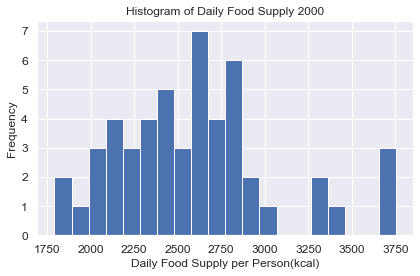

In [63]:
hist_plot(df_00, 2000)

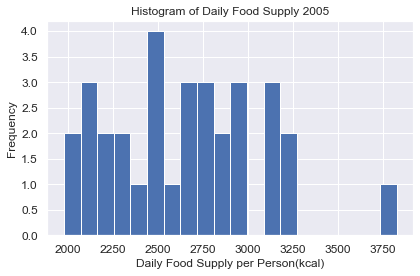

In [64]:
hist_plot(df_05, 2005)

The distribution of the data are generally skewed.  
We'll use the median.

In [65]:
# 2000
df_00.daily_fd_sply_kcal.median()

2588.0

In [66]:
# 2005
df_05.daily_fd_sply_kcal.median()

2667.0

The medians obtained from our datasets are higher than the minimum value of kilocalories.

### Research Question 3: How do different variables relate to  the food supply?

We'll create a number of scatter plots to help us view the relationships.

We'll create a function that helps us create the plots easily.

In [67]:
def scat_plot(df, y_axis, y_label, year):
    ''' 
    Create a scatter plot with y_axis on the y axis.
    
    Parameters:
    -----------
    df : dataframe
        Pandas DataFrame to plot from.
    y_axis : str
        Column to plot on y-axis. It should be inside quote marks.
    y_label : str
        Descriptive label of y_axis variable that will appear in plot title. 
    year : int
        Year the dataset is from. 
    '''
       
    df.plot.scatter(x='daily_fd_sply_kcal', y=y_axis,
                    xlabel='Daily Food Supply (kcal)', c='b',
                    ylabel=f'{y_label} (%)',
                    title=f'{y_label} vs Daily Food Supply {year}');
    return 

### Agricultural Land Area

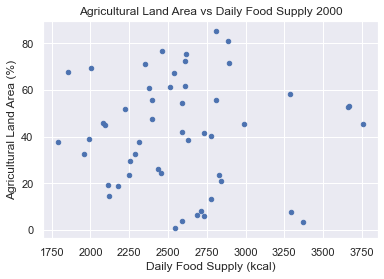

In [68]:
# 2000
scat_plot(df_00, 'ag_land_pct', 'Agricultural Land Area', 2000)

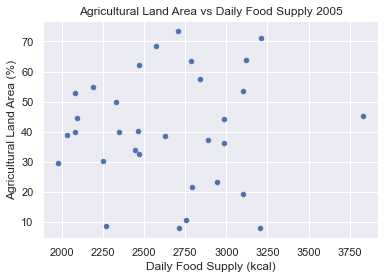

In [69]:
# 2005
scat_plot(df_05, 'ag_land_pct', 'Agricultural Land Area', 2005)

There seems to be no clear relationship between the two variables

### GDP

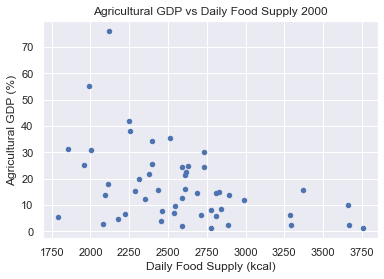

In [70]:
# 2000
scat_plot(df_00, 'ag_gdp_pct', 'Agricultural GDP', 2000)

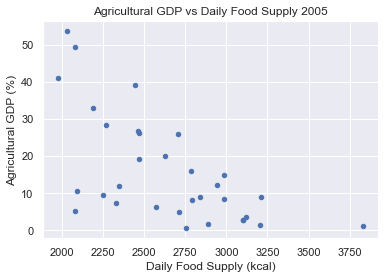

In [71]:
# 2005
scat_plot(df_05, 'ag_gdp_pct', 'Agricultural GDP', 2005)

The relationship between the proportion of agricultural GDP and food supply is negative

### Agricultural Water Use

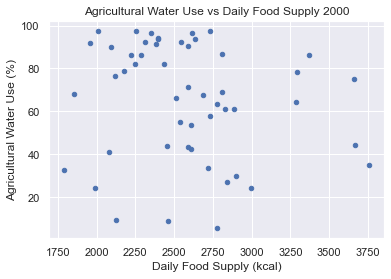

In [72]:
# 2000
scat_plot(df_00, 'ag_water_use_pct', 'Agricultural Water Use', 2000)

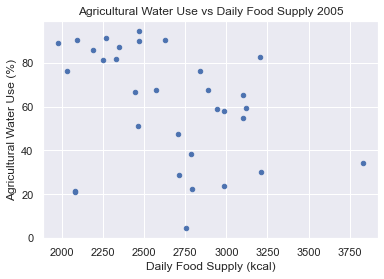

In [73]:
# 2005
scat_plot(df_05, 'ag_water_use_pct', 'Agricultural Water Use', 2005)

There seems to be a somewhat negative relationship between the proportion of agricultural water use and food supply variables 

### Agricultural Workers

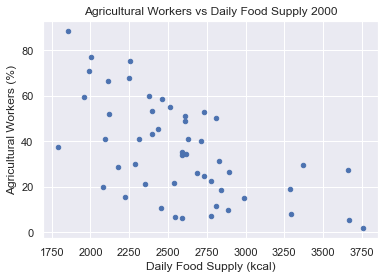

In [74]:
#2000
scat_plot(df_00, 'ag_workers_pct', 'Agricultural Workers', 2000)

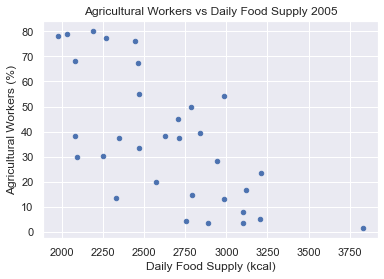

In [75]:
#2005
scat_plot(df_05, 'ag_workers_pct', 'Agricultural Workers', 2005)

The relationship between the proportion of agricultural workers and food supply is negative

### Female Agricultural Workers

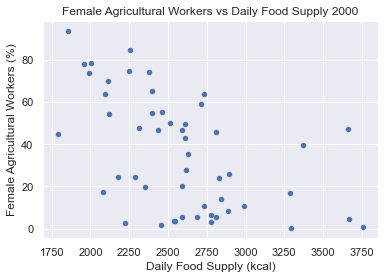

In [76]:
# 2000
scat_plot(df_00, 'f_ag_workers_pct', 'Female Agricultural Workers', 2000)

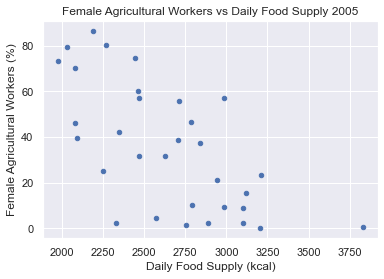

In [77]:
# 2005
scat_plot(df_05, 'f_ag_workers_pct', 'Female Agricultural Workers', 2005)

The relationship between the proportion of female  agricultural workers and food supply is negative

### Male Agricultural Workers

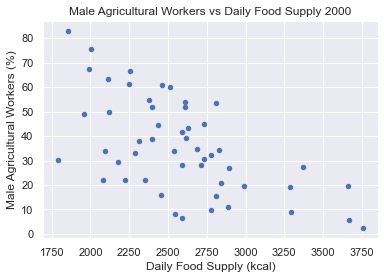

In [78]:
# 2000
scat_plot(df_00, 'm_ag_workers_pct', 'Male Agricultural Workers', 2000)

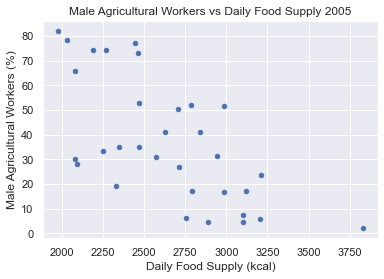

In [79]:
# 2005
scat_plot(df_05, 'm_ag_workers_pct', 'Male Agricultural Workers', 2005)

The relationship between the proportion of male agricultural workers and food supply is negative

### Research Question 4: Which countries have the highest increase in land area, GDP, ag workers, and food supply?
  
We'll need to first find countries that exist in both datasets

In [80]:
# get the common countries
common_countries = np.intersect1d(df_00.geo.unique(), df_05.geo.unique())
common_countries

array(['ago', 'are', 'blr', 'civ', 'dom', 'ecu', 'fji', 'gab', 'lbn',
       'lka', 'mrt', 'mys', 'nga', 'sle', 'slv', 'tto', 'ukr', 'usa',
       'yem'], dtype=object)

We'll create a function that extracts the rows with the common countries from the two DataFrames  
We'll change the `geo` column into the index so that we can remain with numeric-only columns.  
This will help us get the difference between the two dataframes using simple subtraction.

In [81]:
def same_countries(df, countries):
    ''' 
    Return a dataframe with the listed countries.
    
    Parameters:
    -----------
    df : dataframe
        Pandas DataFrame.
    countries : ndarray
        A 1d numpy array containing common countries.
    
    Returns:
    --------
    pandas Dataframe
        Dataframe of rows containing countries in the countries array.
    '''
    
    return df[df.geo.isin(countries)].set_index('geo')

In [82]:
# 2000
df_00_common = same_countries(df_00, common_countries)
df_00_common.head()

,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
geo,,,,,,,
ago,37.66856,5.66469,32.79,37.49670,44.93065,30.19378,1792
are,7.70206,2.26265,78.48,7.89547,0.05890,8.95761,3295
blr,45.61231,12.09683,24.06,15.11376,10.69002,19.49247,2993
civ,61.63522,16.19515,42.58,51.14582,49.67476,51.93197,2612
dom,52.05961,6.71834,86.33,15.60230,2.47701,21.94079,2224


In [83]:
# 2005
df_05_common = same_countries(df_05, common_countries)
df_05_common.head()

,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
geo,,,,,,,
ago,39.89468,5.06040,20.78,38.10669,46.08282,30.15065,2077
are,7.84286,1.39541,82.84,5.18737,0.03520,5.86054,3205
blr,44.12069,8.51859,23.97,12.98557,9.38398,16.61134,2987
civ,63.52201,16.06519,38.43,49.93576,46.64131,51.78895,2787
dom,50.03105,7.21194,82.03,13.68290,2.58033,19.34239,2328


We'll find the difference between the variables in the two dataframes.
> note that having `geo` as the index makes this an easy step

We note that for all columns except daily food supply, the values are in percentages.  
The difference is thus a proportion.  
We will need to calculate the proportion for daily food supply

In [84]:
df_difference = df_05_common - df_00_common
df_difference.head()

,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal
geo,,,,,,,
ago,2.22612,-0.60429,-12.01,0.60999,1.15217,-0.04313,285
are,0.14080,-0.86724,4.36,-2.70810,-0.02370,-3.09707,-90
blr,-1.49162,-3.57824,-0.09,-2.12819,-1.30604,-2.88113,-6
civ,1.88679,-0.12996,-4.15,-1.21006,-3.03345,-0.14302,175
dom,-2.02856,0.49360,-4.30,-1.91940,0.10332,-2.59840,104


We'll now find the percentage proportion of the difference for the daily food supply column

In [85]:
df_difference['daily_fd_sply_pct'] = df_difference.daily_fd_sply_kcal.div(df_00_common.daily_fd_sply_kcal.values) *100
df_difference.head()

,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_kcal,daily_fd_sply_pct
geo,,,,,,,,
ago,2.22612,-0.60429,-12.01,0.60999,1.15217,-0.04313,285,15.904018
are,0.14080,-0.86724,4.36,-2.70810,-0.02370,-3.09707,-90,-2.731411
blr,-1.49162,-3.57824,-0.09,-2.12819,-1.30604,-2.88113,-6,-0.200468
civ,1.88679,-0.12996,-4.15,-1.21006,-3.03345,-0.14302,175,6.699847
dom,-2.02856,0.49360,-4.30,-1.91940,0.10332,-2.59840,104,4.676259


We can drop the `daily_fd_sply_kcal` column since we no longer need it

In [86]:
df_difference.drop(columns ='daily_fd_sply_kcal', inplace=True)
df_difference.head()

,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_pct
geo,,,,,,,
ago,2.22612,-0.60429,-12.01,0.60999,1.15217,-0.04313,15.904018
are,0.14080,-0.86724,4.36,-2.70810,-0.02370,-3.09707,-2.731411
blr,-1.49162,-3.57824,-0.09,-2.12819,-1.30604,-2.88113,-0.200468
civ,1.88679,-0.12996,-4.15,-1.21006,-3.03345,-0.14302,6.699847
dom,-2.02856,0.49360,-4.30,-1.91940,0.10332,-2.59840,4.676259


##  Top 5 Increasers

### Agricultural Land Area

In [87]:
top_five(df_difference, 'ag_land_pct')

,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_pct
0,13.88224,-5.62271,-2.65,-2.50329,-3.73636,-1.24721,4.623116
1,5.66960,-2.65787,-4.66,-1.92197,-1.66931,-2.04828,-5.048662
2,2.55142,-8.10784,-4.90,-3.69126,-5.49874,-2.87031,1.511879
3,2.22612,-0.60429,-12.01,0.60999,1.15217,-0.04313,15.904018
4,1.88679,-0.12996,-4.15,-1.21006,-3.03345,-0.14302,6.699847


The above fails to show the countries.  
The `geo` index has been replaced by the numerical default index.  
We'll reset the index so that we can view countries as well.

In [88]:
df_difference.reset_index(inplace=True)
df_difference.head()

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_pct
0,ago,2.22612,-0.60429,-12.01,0.60999,1.15217,-0.04313,15.904018
1,are,0.14080,-0.86724,4.36,-2.70810,-0.02370,-3.09707,-2.731411
2,blr,-1.49162,-3.57824,-0.09,-2.12819,-1.30604,-2.88113,-0.200468
3,civ,1.88679,-0.12996,-4.15,-1.21006,-3.03345,-0.14302,6.699847
4,dom,-2.02856,0.49360,-4.30,-1.91940,0.10332,-2.59840,4.676259


Everything looks good now. 
We can proceed to get the top 5 countries that increased in agricultural land area.

In [89]:
top_five(df_difference, 'ag_land_pct')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_pct
0,sle,13.88224,-5.62271,-2.65,-2.50329,-3.73636,-1.24721,4.623116
1,lbn,5.66960,-2.65787,-4.66,-1.92197,-1.66931,-2.04828,-5.048662
2,lka,2.55142,-8.10784,-4.90,-3.69126,-5.49874,-2.87031,1.511879
3,ago,2.22612,-0.60429,-12.01,0.60999,1.15217,-0.04313,15.904018
4,civ,1.88679,-0.12996,-4.15,-1.21006,-3.03345,-0.14302,6.699847


The top 5 countries by increase in land area are:  

|No | Country 
|:---|:---
|1 | Sierra Leone 
|2 | Lebanon 
|3 | Sri Lanka 
|4 | Angola 
|5 | Ivory Coast

It's notable that though Sierra Leone has the highest increase in land under agricultural use, they were in the bottom 5 countries by daily food supply.  
Sierra Leone wasn't able to meet the minimum food supply threshold in 2005

### GDP

In [90]:
top_five(df_difference, 'ag_gdp_pct')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_pct
0,nga,0.89653,4.73204,-5.82,-3.81496,-4.12512,-3.53262,3.639847
1,dom,-2.02856,0.49360,-4.30,-1.91940,0.10332,-2.59840,4.676259
2,usa,-0.15928,-0.00820,-1.01,-0.22150,-0.10430,-0.31341,1.944075
3,civ,1.88679,-0.12996,-4.15,-1.21006,-3.03345,-0.14302,6.699847
4,mys,0.59568,-0.33673,-4.55,-3.71982,-3.97826,-3.63808,-1.724745


The top countries by increase in agricultural share of gdp are:

|No | Country 
|:---|:---
|1 | Nigeria
|2 | Dominican Republic

Only two countries saw an increase in the share of agricultural GDP

### Agricultural workers

In [91]:
top_five(df_difference, 'ag_workers_pct')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_pct
0,ago,2.22612,-0.60429,-12.01,0.60999,1.15217,-0.04313,15.904018
1,ecu,-2.27895,-5.92337,-4.77,0.51199,0.84675,0.41002,-1.619256
2,usa,-0.15928,-0.00820,-1.01,-0.22150,-0.10430,-0.31341,1.944075
3,civ,1.88679,-0.12996,-4.15,-1.21006,-3.03345,-0.14302,6.699847
4,slv,1.08591,-1.00112,12.33,-1.62500,1.02153,-3.22360,1.180638


The top countries by increase agricultural employment are:

|No | Country 
|:---|:---
|1 | Angola
|2 | Ecuador

Once again only two countries had an increase in the percentage of workers under agriculture.

### Daily food supply per person

In [92]:
top_five(df_difference, 'daily_fd_sply_pct')

,geo,ag_land_pct,ag_gdp_pct,ag_water_use_pct,ag_workers_pct,f_ag_workers_pct,m_ag_workers_pct,daily_fd_sply_pct
0,ago,2.22612,-0.60429,-12.01,0.60999,1.15217,-0.04313,15.904018
1,ukr,-0.17975,-5.07648,0.00,-3.15801,-2.84622,-3.45706,10.842541
2,civ,1.88679,-0.12996,-4.15,-1.21006,-3.03345,-0.14302,6.699847
3,dom,-2.02856,0.49360,-4.30,-1.91940,0.10332,-2.59840,4.676259
4,sle,13.88224,-5.62271,-2.65,-2.50329,-3.73636,-1.24721,4.623116


The top 5 countries by increase in daily food supply per person:

|No | Country
|:---|:---
|1 | Angola 
|2 | Ukraine
|3 | Ivory Coast
|4 | Dominican Republic
|5 | Sierra Leone

Ukraine was in the 2005 Top 5 countries by daily food supply.  
The 10.84% rise from 2000 led to its rise to Top 5 by daily food supply.

Angola is another country to take note of.   
Though its daily food supply increased by the highest percentage(15.90%) from 2000, it was still in the bottom 5 countries by food supply in 2005. 

#### Further Exploration of the change in daily food supply

Our most important variable is Daily Food Supply.  
We'll plot a histogram of it to see how the difference between the years is distributed

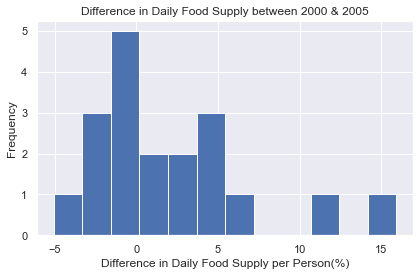

In [93]:
df_difference.daily_fd_sply_pct.plot(kind='hist', bins=12).set(
              xlabel='Difference in Daily Food Supply per Person(%)',
             title='Difference in Daily Food Supply between 2000 & 2005');
plt.tight_layout()

We can see that the distribution is right skewed.  
Most of the data is on the left with a few outliers to the far right.  
Most countries had a change within the -5 to around 7% range 


Angola and Ukraine form the outliers as seen from the previous analysis

The median would be the right statistic to use as a measure of central tendency.

We'll compute some statistical summaries to get another view of our data.

In [94]:
df_difference.daily_fd_sply_pct.describe()

count    19.000000
mean      2.253083
std       4.929781
min      -5.048662
25%      -0.478340
50%       1.180638
75%       4.272689
max      15.904018
Name: daily_fd_sply_pct, dtype: float64

From the above, we can see that the difference in daily food supply is centered around 1%.  

75% of our data is shown to be below 5%, which reflects what we see in the histogram. 

<a id='conclusions'></a>
## Conclusions

#### Top & Bottom Fives
From our lists of top and bottom five countries, we could observe that:

+ Countries that lead in percentage under agricultural land use, agricultural gdp, agricultural water use, and agricultural employment often don't lead in the daily food supply per person in kilocalories.   
  Exceptions to this were Lebanon and Ukraine which topped the list in daily food supply.

+ Countries that led in percentage of agricultural GDP also led in percentage of people under employment.  
  This applied to the total population, and both male & female subcategories.

+ When it comes to water use, there were some countries that stood out whose percentage of land area seemed disproportionate to their water use.  
  However, further investigation showed that they grew some 'thirsty' crops such as rice and sugarcane.

+ When it came to daily food supply, it is interesting that countries that were at the bottom of the list in the other agriculture-related variables topped in daily food supply.

  Some of these countries included USA & UAE. A little knowledge about these countries reveals that they are more developed countries and their dependence on agriculture isn't as much as the developing countries.   
  It's worth noting that many of the countries that have agriculture taking up huge proportions of their land, gdp, and employment do struggle to provide their residents with the minimum recommended daily food supply.
  
  
#### Minimum daily food supply per person.  
 
We were able to note that from our 2000 & 2005 data, there were some countries that still weren't able to meet the minimum value within the 5-year gap.  
These countries include Yemen, Sierra Leone, and Angola.

This however, doesn't mean that they were the only ones. 
Our data didn't give information on all our variables of interest from all countries of the world.  
There were some gaps in our data that led to the exclusion of data from other countries.  
An example is that not all the countries in our initial 2000 data were in the 2005 data.  
This insufficiency led to us having an incomplete view of how countries really performed in these years.  
Countries that lacked information on any of the 7 variables, and perhaps even more especially, countries that didn't have information for the years 2000 & 2005 were unable to be included in our analyses.

#### How daily food supply relates to  the other 6 variables
  - Land area under agriculture was the only variable that seemed to have a positive relationship to daily food supply.
  - Proportion of GDP, ag workers, Female and male workers all had a negative relationship with daily food supply
  - Percentage of water under agricultural use seemed to have no relationship to daily food supply in 2000, but a somewhat negative relationship in 2005
  
  The median of our 2000 and 2005 data was higher than the minimum recommended daily food supply of 2250kcal. 
  
  
#### 2000 Vs 2005 increase in land, employment, GDP, and food supply

##### Land Area
  Sierra Leone and Angola were the only coutries that saw an increase in land area under agriculture.
  
##### GDP
  Nigeria and the Dominican Republic were the only ones to see an increase in the share of agriculture to their GDPs
  
##### Ag Workers
  Angola and Ecuador were the only countries that saw increase in the proportion of ag workers
  
##### Daily food supply
  All the countries in the top 5 list had an increase in food supply. 
  
  
  A country worth noting is **Sierra Leone**. It's 13% increase in land area under agriculture only accounted for 4.62% increase in daily food supply. Sierra Leone was also one of the countries that were unable to meet the minimum recommended daily food supply in 2005. 
  
  
  **Angola** is another country worth noting. A 2% increase in land area under agriculture led to a 15.9% increase in daily food supply. Perhaps Sierra Leone should learn a bit from Angola. Angola, however, suffer the same problem as Sierra Leone in that despite their increases in daily food supply, they weren't able to provide the minimum daily recommended food supply of 2250kcal in 2005.  

  
### Limitations  of this analysis
This work combined developed, developing, and under-developed countries.  
An understanding of the dynamics each of our variables based on the categories that countries fall into could help provide useful informtion that could help countries in developing policies and systems that help them perform better.

The daily food supply is also affected by other variables such as the economic conditions of the country and its people.  
Looking at how other such variables affect the daily food supply can help form a better picture of what things affect the metric.

## Resources

1. [Systema Globalis](https://github.com/open-numbers/ddf--gapminder--systema_globalis/tree/master/countries-etc-datapoints) dataset. 
2. [Laendercode](https://laendercode.net/en/3-letter-list.html) for country abbreviations
3. [Stack Overflow](https://stackoverflow.com/questions/21892570/ipython-notebook-align-table-to-the-left-of-cell) for table alignment